# python中Matplotlib实现绘制3D图方法介绍

http://www.php.cn/python-tutorials-377815.html


Matplotlib 也可以绘制 3D 图像，与二维图像不同的是，绘制三维图像主要通过 mplot3d 模块实现。但是，使用 Matplotlib 绘制三维图像实际上是在二维画布上展示，所以一般绘制三维图像时，同样需要载入 pyplot 模块。
mplot3d 模块下主要包含 4 个大类，分别是：

mpl_toolkits.mplot3d.axes3d()

mpl_toolkits.mplot3d.axis3d()

mpl_toolkits.mplot3d.art3d()

mpl_toolkits.mplot3d.proj3d()

其中，axes3d() 下面主要包含了各种实现绘图的类和方法。axis3d() 主要是包含了和坐标轴相关的类和方法。art3d() 包含了一些可将 2D 图像转换并用于 3D 绘制的类和方法。proj3d() 中包含一些零碎的类和方法，例如计算三维向量长度等。

一般情况下，我们用到最多的就是 mpl_toolkits.mplot3d.axes3d() 中的mpl_toolkits.mplot3d.axes3d.Axes3D() 类，而 Axes3D() 下面又存在绘制不同类型 3D 图的方法。你可以通过下面的方式导入 Axes3D()。

from mpl_toolkits.mplot3d.axes3d import Axes3D或from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

def make_kdeplot(varX, varY, (a,b), (c,d), N, colorsc, title):
    #varX, varY are lists, 1d numpy.array(s), or dataframe columns, storing the values of two variables

    x, y, Z = kde_scipy(varY, varX, (a,b), (c,d), N )

    data = Data([
       Contour(
           z=Z,
           x=x,
           y=y,
           colorscale=colorsc,
           #reversescale=True,
           opacity=0.9,
           contours=Contours(
               showlines=False)
        ),
     ])

    layout = Layout(
        title= title,
        font= Font(family='Georgia, serif',  color='#635F5D'),
        showlegend=False,
        autosize=False,
        width=650,
        height=650,
        xaxis=XAxis(
            range=[a,b],
            showgrid=False,
            nticks=7
        ),
        yaxis=YAxis(
            range=[c,d],
            showgrid=False,
            nticks=7
        ),
        margin=Margin(
            l=40,
            r=40,
            b=85,
            t=100,
        ),
    )

    return Figure( data=data, layout=layout )

N=200
a,b=(5,11)
fig=make_kdeplot(dfc['multiannual'], dfc['bachelor-th'], (a,b), (a,b),
                 N, cubehelix_cs,'kde plot of two sets of data' )

py.sign_in('empet', 'my_api_key')
py.iplot(fig, filename='kde-2D-CSCE')

## Basic Ribbon Plot

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

import urllib
import numpy as np

url = "https://raw.githubusercontent.com/plotly/datasets/master/spectral.csv"
f = urllib.urlopen(url)
spectra=np.loadtxt(f, delimiter=',')

traces = []
y_raw = spectra[:, 0] # wavelength
sample_size = spectra.shape[1]-1 
for i in range(1, sample_size):
    z_raw = spectra[:, i]
    x = []
    y = []
    z = []
    ci = int(255/sample_size*i) # ci = "color index"
    for j in range(0, len(z_raw)):
        z.append([z_raw[j], z_raw[j]])
        y.append([y_raw[j], y_raw[j]])
        x.append([i*2, i*2+1])
    traces.append(dict(
        z=z,
        x=x,
        y=y,
        colorscale=[ [i, 'rgb(%d,%d,255)'%(ci, ci)] for i in np.arange(0,1.1,0.1) ],
        showscale=False,
        type='surface',
    ))

fig = { 'data':traces, 'layout':{'title':'Ribbon Plot'} }
py.iplot(fig, filename='ribbon-plot-python')

ModuleNotFoundError: No module named 'plotly'

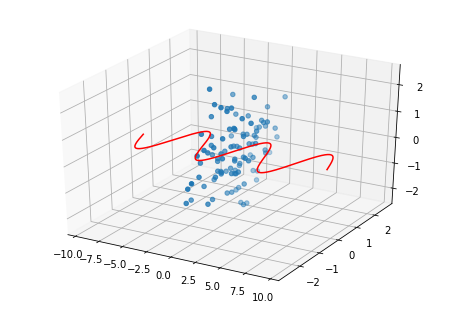

In [3]:
# -*- coding: utf-8 -*
# 载入模块
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
 
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)
 
# 生成数据并绘制图 1
x1 = np.linspace(-3 * np.pi, 3 * np.pi, 500)
y1 = np.sin(x1)
ax.plot(x1, y1, zs=0, c='red')
 
# 生成数据并绘制图 2
x2 = np.random.normal(0, 1, 100)
y2 = np.random.normal(0, 1, 100)
z2 = np.random.normal(0, 1, 100)
ax.scatter(x2, y2, z2)
 
# 显示图
plt.show()